**Data Extraction**

Executed in ```data_extraction.py```, the attributes of each sample patient is taken from the ```heart.csv``` and placed in a NumPy array. A NumPy array allows for complex manipulation and editing of multideimnesional arrays (in our case, a 2D array).

In [309]:
!python data_extraction.py

[EXTRACT] Row 0 finished
[EXTRACT] Row 1 finished
[EXTRACT] Row 2 finished
[EXTRACT] Row 3 finished
[EXTRACT] Row 4 finished
[EXTRACT] Row 5 finished
[EXTRACT] Row 6 finished
[EXTRACT] Row 7 finished
[EXTRACT] Row 8 finished
[EXTRACT] Row 9 finished
[EXTRACT] Row 10 finished
[EXTRACT] Row 11 finished
[EXTRACT] Row 12 finished
[EXTRACT] Row 13 finished
[EXTRACT] Row 14 finished
[EXTRACT] Row 15 finished
[EXTRACT] Row 16 finished
[EXTRACT] Row 17 finished
[EXTRACT] Row 18 finished
[EXTRACT] Row 19 finished
[EXTRACT] Row 20 finished
[EXTRACT] Row 21 finished
[EXTRACT] Row 22 finished
[EXTRACT] Row 23 finished
[EXTRACT] Row 24 finished
[EXTRACT] Row 25 finished
[EXTRACT] Row 26 finished
[EXTRACT] Row 27 finished
[EXTRACT] Row 28 finished
[EXTRACT] Row 29 finished
[EXTRACT] Row 30 finished
[EXTRACT] Row 31 finished
[EXTRACT] Row 32 finished
[EXTRACT] Row 33 finished
[EXTRACT] Row 34 finished
[EXTRACT] Row 35 finished
[EXTRACT] Row 36 finished
[EXTRACT] Row 37 finished
[EXTRACT] Row 38 finis

In [398]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
import random
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, Adagrad
from data_augmentation import avg_combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

**Data Augmentation**

Augmentation is a crucial element of preparing a dataset for training. Although relatively simple, it helps the neural network recognize patterns with limited data.

In [312]:
def avg_combinations(x, n_augmentations):
  n_features = len(x[0])
  avg_col = [np.mean(x[:, i]) for i in range(n_features)]

  for i in range(n_augmentations):
    selected_case = x[int(random.randint(0, len(x)-1)), :]
    
    for j in range(random.randint(0, n_features)):
      removed_feature_index = random.randint(0, n_features-1)
      selected_case[removed_feature_index] = avg_col[removed_feature_index]
    
    np.append(x, selected_case)
  
  return x

**Unpacking Files**

This code snippet unpacks the files created in ```
data_extraction.py```. Furthermore, it splits the data into its classifcations, an action necessary for the next step of augmentation.



In [313]:
def open_files():
  # extracts the data from the two .pkl files
  X = []
  y = []

  with open('X.pkl', 'rb') as r:
    X = pickle.load(r)

  with open('y.pkl', 'rb') as r:
    y = pickle.load(r)
  
  y = [p[0] for p in y]

  X_0 = []
  X_1 = []
  for i in range(len(X)):
    if y[i] == 0:
        X_0.append(X[i])
    else:
        X_1.append(X[i])

  X_0 = np.array(X_0)
  X_1 = np.array(X_1)
  return X_0, X_1

X_0, X_1 = open_files()

In [318]:
X_0 = avg_combinations(X_0, 200)
X_1 = avg_combinations(X_1, 200)

y_0 = np.array([[0] for x in range(len(X_0))])
y_1 = np.array([[1] for x in range(len(X_1))])


In [319]:
X = np.concatenate((X_0, X_1))
y = np.concatenate((y_0, y_1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train = np.array(y_train)
y_test = np.array(y_test)

**Model Creation and Training**

By far the most important part, this code snippet contains the actual design for the neural network, incuding the number of hidden layers, the number of neurons for each, and their activiation layers. It also trains the model with the data prepared earlier for 100 epochs.

In [345]:
prediction_model = Sequential([
  Dense(7, input_dim=7, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(80, activation='relu'),
  Dense(80, activation='relu'),
  Dense(80, activation='relu'),
  Dense(80, activation='relu'),
  Dense(16, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid')                            
]);

prediction_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

training_results = prediction_model.fit(X_train, y_train, batch_size=3, epochs=100, validation_split=0.1)

Epoch 1/100
64/64 [==============================] - 1s 7ms/step - loss: 0.6888 - accuracy: 0.4960 - val_loss: 0.6424 - val_accuracy: 0.9091
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5836 - accuracy: 0.7097 - val_loss: 0.3446 - val_accuracy: 0.9091
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.7850 - val_loss: 0.2063 - val_accuracy: 0.9545
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.9258 - val_loss: 0.2370 - val_accuracy: 0.9091
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8828 - val_loss: 0.1700 - val_accuracy: 0.9545
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.9154 - val_loss: 0.1801 - val_accuracy: 0.9545
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.9503 - val_loss: 0.2545 - val_accuracy: 0.9545
Epoch 8/100
6

**Testing the Model**

Now, we test the model against samples that were not used for the training.

In [348]:
results = prediction_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.2210 - accuracy: 0.9670


In [349]:
prediction_model.save('model_9670.h5')

**Visualizations**

Now, we can look under the hood and see how the model preformed during the training. It is imperative that we do this as it allows us to identify overfitting, underfitting, or any possible oversights.

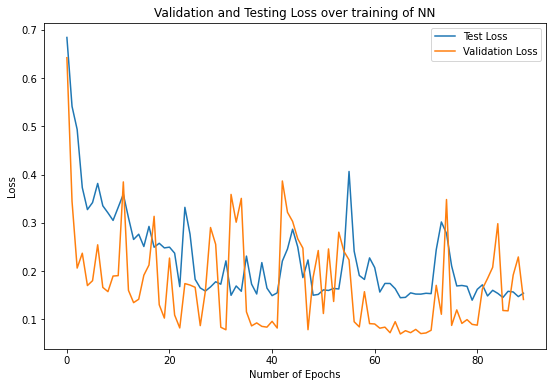

In [368]:
graph_size = (9,6)

plt.figure(figsize=graph_size)

plt.plot(training_results.history['loss'][:90], label='Test Loss')
plt.plot(training_results.history['val_loss'][:90], label='Validation Loss')
plt.title('Validation and Testing Loss over training of NN')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.show()

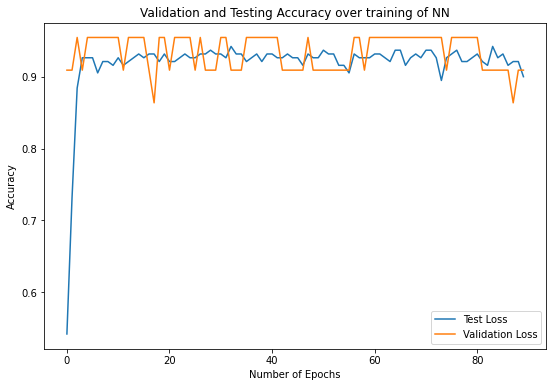

In [370]:
plt.figure(figsize=graph_size)

plt.plot(training_results.history['accuracy'][:90], label='Test Loss')
plt.plot(training_results.history['val_accuracy'][:90], label='Validation Loss')
plt.title('Validation and Testing Accuracy over training of NN')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.show()

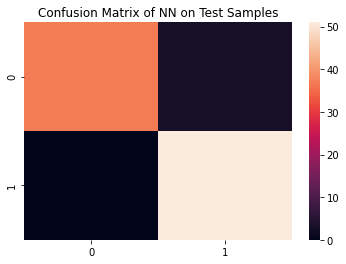

In [399]:
# Confusion Matrix
y_pred = prediction_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred.round())
plt.title('Confusion Matrix of NN on Test Samples')
plt.xlabel('Predicted Classification')
plt.ylabel('True Classification')
sn.heatmap(confusion_matrix)